In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
pop = pd.read_excel("05. population_raw_data.xlsx", header=1)
pop.fillna(method='pad', inplace=True)

pop.rename(columns = {'행정구역(동읍면)별(1)':'광역시도',
                     '행정구역(동읍면)별(2)':'시도',
                     '계':'인구수'}, inplace=True)

pop = pop[(pop['시도'] != '소계')]
pop.head()

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


In [7]:
pop.is_copy = False
pop.rename(columns = {'항목':'구분'}, inplace=True)

pop.loc[pop['구분']=='총인구수 (명)', '구분'] = '합계'
pop.loc[pop['구분']=='남자인구수 (명)', '구분'] = '남자'
pop.loc[pop['구분']=='여자인구수 (명)', '구분'] = '여자'

pop.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


In [8]:
pop['20-39세'] = pop['20 - 24세'] + pop['25 - 29세'] + pop['30 - 34세'] + pop['35 - 39세']
pop['65세이상'] = pop['65 - 69세'] + pop['70 - 74세'] + pop['75 - 79세'] + pop['80 - 84세'] + \
                  pop['85 - 89세'] + pop['90 - 94세'] + pop['95 - 99세'] + pop['100+']

pop.head(10)


,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,20388.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8852.0
11,서울특별시,중구,여자,63045.0,4074.0,4737.0,5140,4886.0,3286.0,2908.0,2375,1573.0,846.0,337.0,102,109.0,18837.0,11536.0
12,서울특별시,용산구,합계,230241.0,14317.0,16972.0,19032,19127.0,10675.0,9093.0,7477,4553.0,2254.0,916.0,264,315.0,69448.0,35547.0
13,서울특별시,용산구,남자,111601.0,6937.0,8373.0,9455,9434.0,4834.0,3975.0,3094,1739.0,750.0,284.0,102,88.0,34199.0,14866.0
14,서울특별시,용산구,여자,118640.0,7380.0,8599.0,9577,9693.0,5841.0,5118.0,4383,2814.0,1504.0,632.0,162,227.0,35249.0,20681.0
15,서울특별시,성동구,합계,299259.0,20813.0,23383.0,25507,25979.0,12938.0,10734.0,7989,4450.0,1944.0,678.0,209,198.0,95682.0,39140.0


In [9]:
pop = pd.pivot_table(pop, index = ['광역시도', '시도'], columns = ['구분'], values = ['인구수', '20-39세', '65세이상'])
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                              
구분              여자        합계  
광역시도 시도                       
강원도  강릉시  107615.0  213846.0  
     고성군   14215.0   30114.0  
     동해시   46131.0   93297.0  
     삼척시   34346.0   69599.0  
     속초시   41505.0   81793.0

In [10]:
pop['소멸비율'] = pop['20-39세','여자'] / (pop['65세이상', '합계'] /2)
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율  
구분              여자        합계            
광역시도 시도                                 
강원도  강릉시  107615.0  213846.0  1.226041  
     고성군   14215.0   30114.0  0.707314  
     동해시   46131.0   93297.0  1.289738  
     삼척시   34346.0   69599.0  0.973990  
     속초시   41505.0   81793.0  1.372647

In [12]:
pop.sort_values(by='소멸비율', ascending = False)

20-39세                       65세이상                         인구수  \
구분              남자       여자        합계       남자       여자       합계        남자   
광역시도  시도                                                                     
경기도   영통구  59277.0  56425.0  115702.0   7783.0  11359.0  19142.0  171452.0   
경상남도  성산구  37364.0  32213.0   69577.0   5726.0   7817.0  13543.0  118468.0   
충청남도  서북구  63523.0  57966.0  121489.0  11150.0  15664.0  26814.0  182987.0   
울산광역시 북구   31236.0  27298.0   58534.0   5449.0   7536.0  12985.0  101096.0   
대전광역시 유성구  56011.0  51790.0  107801.0  10709.0  14765.0  25474.0  173072.0   
...            ...      ...       ...      ...      ...      ...       ...   
경상남도  합천군   3998.0   3180.0    7178.0   6212.0  10760.0  16972.0   22825.0   
      남해군   3715.0   2932.0    6647.0   5885.0   9807.0  15692.0   21566.0   
경상북도  군위군   2012.0   1566.0    3578.0   3606.0   5064.0   8670.0   12156.0   
전라남도  고흥군   5195.0   4387.0    9582.0   9914.0  15450.0  25364.0   32556.0   
경상북도  의성군   4390.0   3326.0    7716.0   8004.0  11892.0  19896.0   26334.0   

                                   소멸비율  
구분               여자        합계            
광역시도  시도                                 
경기도   영통구  169202.0  340654.0  5.895413  
경상남도  성산구  113103.0  231571.0  4.757144  
충청남도  서북구  176049.0  359036.0  4.323562  
울산광역시 북구    94189.0  195285.0  4.204544  
대전광역시 유성구  170150.0  343222.0  4.066107  
...             ...       ...       ...  
경상남도  합천군   25201.0   48026.0  0.374735  
      남해군   23563.0   45129.0  0.373694  
경상북도  군위군   12015.0   24171.0  0.361246  
전라남도  고흥군   35100.0   67656.0  0.345923  
경상북도  의성군   27680.0   54014.0  0.334339  

[264 rows x 10 columns]

In [14]:
pop['소멸위기지역'] = pop['소멸비율'] < 1.0
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율 소멸위기지역  
구분              여자        합계                   
광역시도 시도                                        
강원도  강릉시  107615.0  213846.0  1.226041  False  
     고성군   14215.0   30114.0  0.707314   True  
     동해시   46131.0   93297.0  1.289738  False  
     삼척시   34346.0   69599.0  0.973990   True  
     속초시   41505.0   81793.0  1.372647  False

In [15]:
pop[pop['소멸위기지역']].index.get_level_values(1)

Index(['고성군', '삼척시', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군',
       '연천군', '거창군', '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함안군',
       '함양군', '합천군', '고령군', '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '동구', '영도구',
       '강화군', '옹진군', '강진군', '고흥군', '곡성군', '구례군', '담양군', '보성군', '신안군', '영광군',
       '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군', '고창군', '김제시',
       '남원시', '무주군', '부안군', '순창군', '임실군', '장수군', '정읍시', '진안군', '공주시', '금산군',
       '논산시', '보령시', '부여군', '서천군', '예산군', '청양군', '태안군', '홍성군', '괴산군', '단양군',
       '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

In [19]:
len(pop[pop['소멸위기지역']].index)

83

In [20]:
pop.reset_index(inplace=True)
pop.head()

광역시도   시도   20-39세                      65세이상                         인구수  \
구분                 남자       여자       합계       남자       여자       합계        남자   
0   강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
1   강원도  고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
2   강원도  동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
3   강원도  삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
4   강원도  속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                            소멸비율 소멸위기지역  
구분        여자        합계                   
0   107615.0  213846.0  1.226041  False  
1    14215.0   30114.0  0.707314   True  
2    46131.0   93297.0  1.289738  False  
3    34346.0   69599.0  0.973990   True  
4    41505.0   81793.0  1.372647  False

In [24]:
tmp_col = [pop.columns.get_level_values(0)[n] + pop.columns.get_level_values(1)[n] for n in range(0, len(pop.columns))]
pop.columns = tmp_col
pop.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


In [25]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      264 non-null    object 
 1   시도        264 non-null    object 
 2   20-39세남자  264 non-null    float64
 3   20-39세여자  264 non-null    float64
 4   20-39세합계  264 non-null    float64
 5   65세이상남자   264 non-null    float64
 6   65세이상여자   264 non-null    float64
 7   65세이상합계   264 non-null    float64
 8   인구수남자     264 non-null    float64
 9   인구수여자     264 non-null    float64
 10  인구수합계     264 non-null    float64
 11  소멸비율      264 non-null    float64
 12  소멸위기지역    264 non-null    bool   
dtypes: bool(1), float64(10), object(2)
memory usage: 25.1+ KB


In [26]:
pop.describe()

,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,2.640000e+02,264.000000
mean,33785.602273,31404.295455,65189.897727,12900.575758,17603.606061,30504.181818,116842.962121,116944.454545,2.337874e+05,1.736759
std,32024.215896,30854.741369,62815.676152,9006.782345,11824.054369,20805.025188,103231.618505,103893.096201,2.070534e+05,1.015926
min,1252.000000,863.000000,2115.000000,966.000000,1188.000000,2154.000000,5430.000000,4571.000000,1.000100e+04,0.334339
25%,6794.000000,5297.750000,12171.500000,5949.000000,8909.750000,15015.500000,31919.500000,32483.250000,6.386950e+04,0.759500
50%,27881.000000,24353.500000,52153.000000,10794.000000,14833.000000,25427.000000,98913.000000,96087.500000,1.945240e+05,1.716131
75%,49536.750000,47121.000000,95423.250000,17223.000000,22418.000000,39698.750000,168800.250000,169432.750000,3.397765e+05,2.452575
max,197479.000000,183461.000000,380940.000000,49915.000000,67293.000000,117208.000000,601152.000000,592889.000000,1.194041e+06,5.895413


In [27]:
pop['시도'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

In [28]:
si = [None]*len(pop)
tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'],
              '성남':['수정구', '중원구', '분당구'],
              '안양':['만안구', '동안구'],
              '안산':['상록구', '단원구'],
              '고양':['덕양구', '일산동구', '일산서구'],
              '용인':['처인구', '기흥구', '수지구'],
              '청주':['상당구', '서원구', '흥덕구', '청원구'],
              '천안':['동남구', '서북구'],
              '전주':['완산구', '덕진구'],
              '포항':['남구', '북구'],
              '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'],
              '부천':['오정구', '원미구', '소사구']}

In [30]:
for n in pop.index:
    # [-3:] 끝 3글자
    if pop['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
        # [:-1] 끝 1글자 빼고 나머지
        if pop['시도'][n][:-1] =='고성' and pop['광역시도'][n] =='강원도':
            si[n] = '고성(강원)'
        elif pop['시도'][n][:-1]=='고성' and pop['광역시도'][n] =='경상남도':
            si[n] = '고성(경남)'
        else:
            try:
                si[n] = pop['시도'][n][:-1]
            except:
                pass
            
        for keys, values in tmp_gu_dict.items():
            if pop['시도'][n] in values:
                if len(pop['시도'][n])==2:
                    si[n] = keys + ' '+pop['시도'][n]
                    
                elif pop['시도'][n] in ['마산합포구', '마산회원구']:
                    si[n] = keys + ' '+pop['시도'][n][2:-1]
                else:
                    si[n]  = keys + ' '+pop['시도'][n][:-1]
                    
    elif pop['광역시도'][n] == '세종특별자치시':
        si[n]= '세종'
    else:
        if len(pop['시도'][n]) == 2:
            si[n] = pop['광역시도'][n][:2]+ ' '+pop['시도'][n]
        else:
            # '시도'가 3글자 이상이면 보통 뒤에 구, 군, 시 등이 붙으므로 2글자로 맞춰줌
            si[n] = pop['광역시도'][n][:2]+ ' '+ pop['시도'][n][:-1]
si


['강릉',
 '고성(강원)',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '수원 권선',
 '용인 기흥',
 '김포',
 '남양주',
 '안산 단원',
 '고양 덕양',
 '동두천',
 '안양 동안',
 '안양 만안',
 '부천',
 '성남 분당',
 '안산 상록',
 '성남',
 '부천 소사',
 '수원',
 '성남 수정',
 '용인 수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '수원 영통',
 '오산',
 '부천 오정',
 '용인',
 '부천 원미',
 '의왕',
 '의정부',
 '이천',
 '고양 일산동',
 '고양 일산서',
 '수원 장안',
 '성남 중원',
 '용인 처인',
 '파주',
 '수원 팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성(경남)',
 '김해',
 '남해',
 '창원 합포',
 '창원 회원',
 '밀양',
 '사천',
 '산청',
 '창원 성산',
 '양산',
 '의령',
 '창원 의창',
 '진주',
 '창원 진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '포항 남구',
 '문경',
 '봉화',
 '포항 북구',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구

In [31]:
pop['ID'] = si

In [33]:
del pop['20-39세남자']
del pop['65세이상남자']
del pop['65세이상여자']
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


In [36]:
# dk_raw = pd.read_excel("05. draw_korea_raw.xlsx", encoding='EUC=kR')
dk_raw = pd.read_excel("05. draw_korea_raw.xlsx")
dk_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [45]:
dk_s = pd.DataFrame(dk_raw.stack())
dk_s.reset_index(inplace=True)
dk_s.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'}, inplace=True)
dk_s

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [46]:
dk = dk_s

In [47]:
BORDER_LINES = [[(5, 1), (5, 2), (7, 2), (7, 3), (11,3), (11, 0)],
    [(5, 4), (5, 5), (2, 5), (2, 7), (4, 7), (4, 9), (7, 9), (7, 7), (9, 7), (9, 5), (10, 5), (10, 4), (5, 4)], 
    [(1, 7), (1, 8), (3, 8), (3, 10), (10, 10), (10, 7), (12, 7), (12, 6), (11, 6), (11, 5), (12, 5), (12, 4), (11, 4),(11, 3)], 
    [(8, 10), (8, 11), (6, 11), (6, 12)], 
    [(12, 5), (13, 5), (13, 4), (14, 4), (14, 5), (15, 5), (15, 4), (16, 4), (16, 2)], 
    [(16, 4), (17, 4), (17, 5), (16, 5), (16, 6), (19, 6), (19, 5), (20, 5), (20, 4), (21, 4), (21, 3), (19, 3), (19, 1)],
    [(13, 5), (13, 6), (16, 6)],
    [(13, 5), (14, 5)],
    [(21, 2), (21, 3), (22, 3), (22, 4), (24, 4),(24,2), (21, 2)],
    [(20, 5), (21, 5), (21, 6), (23, 6)],
    [(10, 8), (12, 8), (12, 9), (14, 9), (14, 8), (16, 8), (16, 6)],
    [(14, 9), (14, 11), (14, 12), (13, 12), (13, 13)],
    [(15, 8), (17, 8), (17, 10), (16, 10), (16, 11), (14, 11)],
    [(17, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10), (21, 10)],
    [(16, 11), (16, 13)],
    [(27, 5), (27, 6), (25, 6)],
]

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/ba

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47329 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50725 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/ba

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 50756 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 54632 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 45397 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 48128 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.

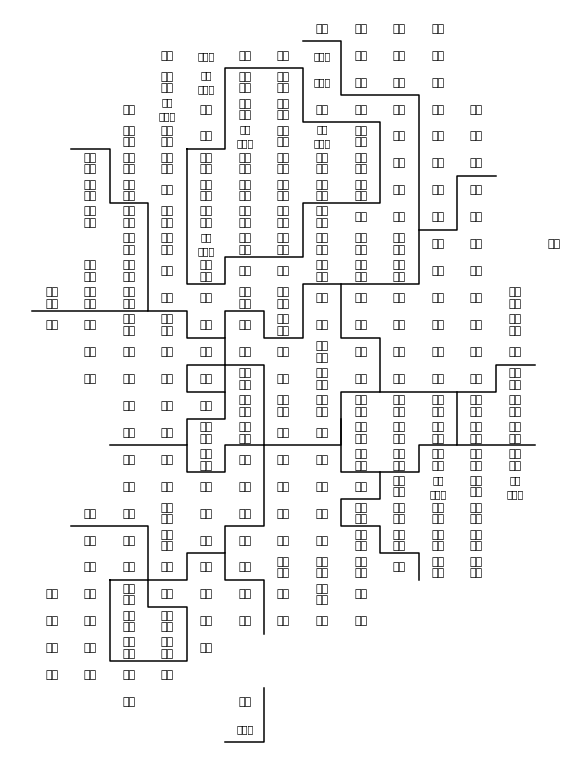

In [49]:
plt.figure(figsize=(8, 11))
for idx, row in dk.iterrows():
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2] =='고성':
        dispname = '고성'
    else:
        dispname = row['ID']
        
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2
    
    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold', fontsize= fontsize, ha='center', va='center', linespacing=linespacing)

for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
plt.axis('off')
plt.tight_layout()
plt.show()


In [51]:
tmp_list = list(set(pop['ID'].unique()) - set(dk['ID'].unique()))

for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID'] == tmp].index)
    
print(set(pop['ID'].unique()) - set(dk['ID'].unique()))
set()

set()


set()

In [53]:
pop = pd.merge(pop, dk, how='left', on=['ID'])
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10


In [54]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = .75
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData]))*0.25 + min(blockedMap[targetData])
    datalabel = targetData
    
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    
    mapdata = blockedMap.pivot_table(index='y', columns = 'x', values = targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize = (6, 8))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)
    
    for idx, row in blockedMap.iterrows():
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2] =='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 8, 1.1
        else:
            fontsize, linespacing = 9, 0.9
            
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold', fontsize= fontsize, ha='center', va='center', linespacing=linespacing)
        
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)
    
    plt.gca().invert_yaxis()
    plt.axis('off')
    cb =plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)
    
    plt.tight_layout()
    plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47497 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/ba

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/ba

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 45812 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.

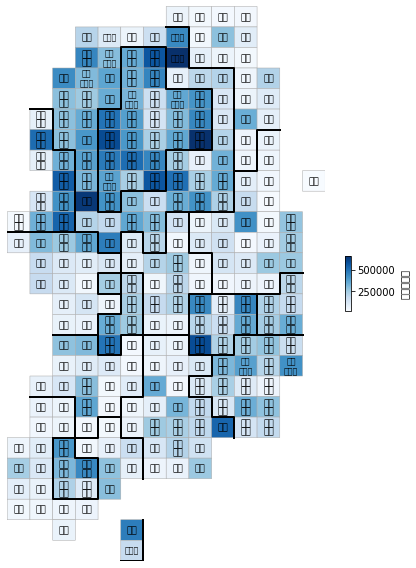

In [55]:
drawKorea('인구수합계', pop, 'Blues')

In [56]:
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10


/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47497 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/ba

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50756 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/ba

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 50745 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 47168 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 45812 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.

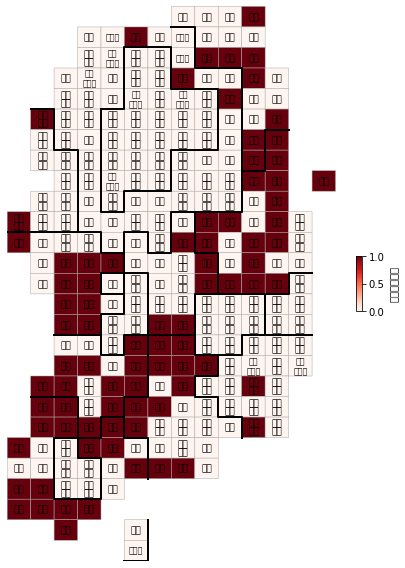

In [59]:
pop['소멸위기지역'] = [1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역', pop, 'Reds')

In [60]:
def drawKorea2(targetData, blockedMap, cmapname):
    gamma = .75
    whitelabelmin = 20.
    datalabel = targetData
    
    #음수가 존재할 수 있기 때문에 절대값으로 변경
    tmp_max = max([np.abs(min(blockedMap[targetData])), np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max
        
    mapdata = blockedMap.pivot_table(index='y', columns = 'x', values = targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize = (6, 8))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)
    
    for idx, row in blockedMap.iterrows():
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2] =='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 8, 1.1
        else:
            fontsize, linespacing = 9, 0.9
            
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold', fontsize= fontsize, ha='center', va='center', color=annocolor, linespacing=linespacing)
        
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)
    
    plt.gca().invert_yaxis()
    plt.axis('off')
    cb =plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)
    
    plt.tight_layout()
    plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47497 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/ba

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45812 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/ba

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 46993 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.

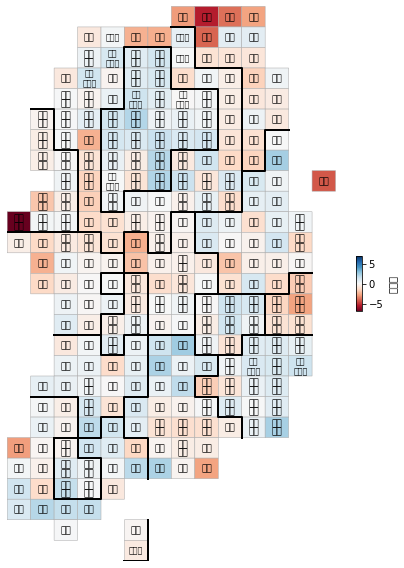

In [62]:
pop['여성비'] = (pop['인구수여자']/pop['인구수합계'] - 0.5) * 100
drawKorea2('여성비', pop,'RdBu')

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47497 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/ba

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45812 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/ba

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 47168 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 45812 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.

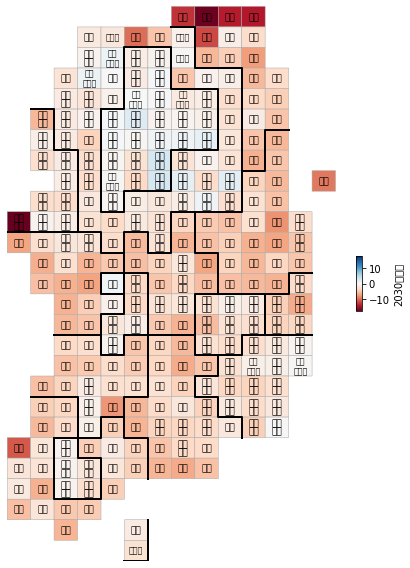

In [63]:
pop['2030여성비'] = (pop['20-39세여자']/pop['20-39세합계'] - 0.5) * 100
drawKorea2('2030여성비', pop,'RdBu')

In [64]:
pop_f = pop.set_index('ID')
pop_f.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,
강릉,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,0,3,11,0.323597,-3.227766
고성(강원),강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,1,0,10,-2.796042,-13.989748
동해,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,0,4,11,-0.554680,-4.133747
삼척,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,1,5,11,-0.651590,-5.033812
속초,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,0,1,10,0.743951,-3.217875


In [66]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [72]:
geo_path = '05. skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zooom_start = 7)
map.choropleth(geo_data,
              data = pop_f['인구수합계'],
              columns = [pop_f.index, pop_f['인구수합계']],
              fill_color = 'YlGnBu',
              key_on = 'feature.id')
map

In [80]:
# geo_path = '05. skorea_municipalities_geo_simple.json'
# geo_data = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zooom_start = 7)
map.choropleth(geo_data,
              data = pop_f['소멸위기지역'],
              columns = [pop_f.index, pop_f['소멸위기지역']],
              fill_color = 'YlGnBu',
              key_on = 'feature.id')
map